# Final Project Description #


Historical 1800 and 1830 Chinese Flood and Drought Data Analysis

We have acquired 250 pages of accounts of climate, harvests and data from Chinese sources. The data is sorted by province and there is a latitude and longitude, Chinese name and English name for each city in word. The data covers the time from 1800 to 1830. Currently we have organized two years of data including geographical locations (longitudes, latitudes), provinces and city names into excel format. In this project I hope to turn the different types of climate and harvest data into time series and maps that could be accessed by researchers in general. I also hope to look into the current flood and drought data in China for the present.  The climate in China is affected by El Nino and La Nina cycles as well as by volcanic eruptions so this data set could be used to assess the relative affects of volcanism on climate and agriculture in China during this 30-year period. If possible, I can also look at PMIP (paleomodel intercomparison) data that overlaps with this period to see how well these climate signals are reproduced in existing climate models. I can do an EOF analysis to find out the principal component and compare 1800s and current climate.



In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

df = pd.read_csv('tot_1830_edited.csv',na_values=[-999, 'NaN'])
df.head()

,Province,Name,Lat,Lon,Dro,Prec,Flood
0,Greater Beijing,Beijing,39.90,116.40,NaN,NaN,NaN
1,Greater Beijing,Miyun,40.39,116.84,NaN,NaN,NaN
2,Greater Beijing,Pinggu,40.13,117.11,NaN,NaN,NaN
3,Greater Beijing,Tong (now Tongzhou district in Beijing),39.90,116.70,NaN,NaN,NaN
4,Greater Beijing,Shunyi,40.12,116.71,NaN,NaN,NaN


In [3]:
df_1800 = pd.read_csv('1800.csv',na_values=[-999, 'NaN'])
df_1800.head()

,Province,Name,Lat,Lon,Dro,Flood,Prec
0,Greater Beijing,Beijing,39.90,116.40,NaN,NaN,NaN
1,Greater Beijing,Miyun,40.39,116.84,NaN,NaN,NaN
2,Greater Beijing,Pinggu,40.13,117.11,NaN,NaN,NaN
3,Greater Beijing,Tong (now Tongzhou district in Beijing),39.90,116.70,NaN,NaN,NaN
4,Greater Beijing,Shunyi,40.12,116.71,NaN,NaN,NaN


Text(0,0.5,'Count')

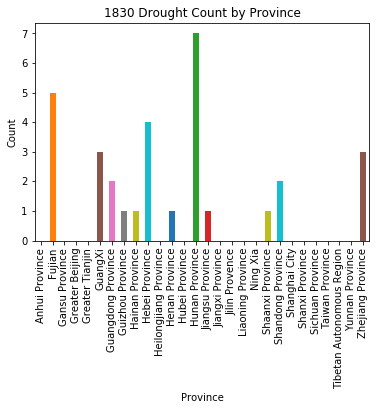

In [4]:
fig,ax11 = plt.subplots()
df.groupby('Province').Dro.count().plot(kind='bar',ax=ax11)
ax11.set_title('1830 Drought Count by Province')
ax11.set_ylabel('Count')

Text(0,0.5,'Count')

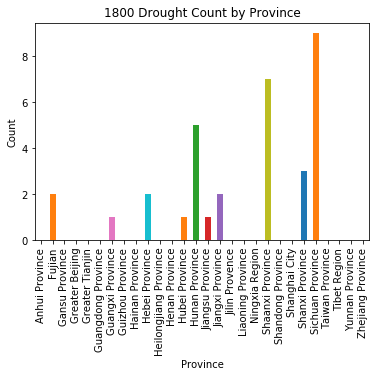

In [5]:
fig,ax111 = plt.subplots()
df_1800.groupby('Province').Dro.count().plot(kind='bar',ax=ax111)
ax111.set_title('1800 Drought Count by Province')
ax111.set_ylabel('Count')

Text(0,0.5,'Count')

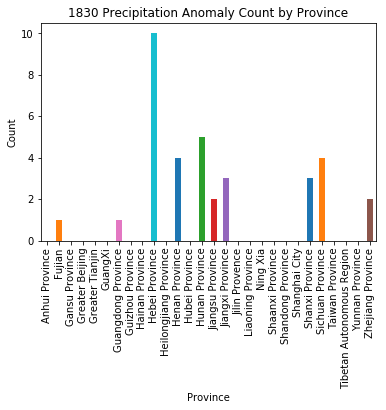

In [6]:
fig,ax22 = plt.subplots()
df.groupby('Province').Prec.count().plot(kind='bar',ax=ax22)
ax22.set_title('1830 Precipitation Anomaly Count by Province')
ax22.set_ylabel('Count')

Text(0,0.5,'Count')

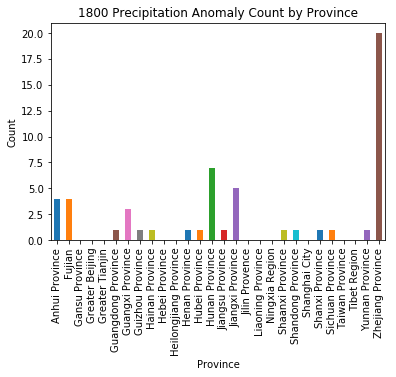

In [8]:
fig,ax222 = plt.subplots()
df_1800.groupby('Province').Prec.count().plot(kind='bar',ax=ax222)
ax222.set_title('1800 Precipitation Anomaly Count by Province')
ax222.set_ylabel('Count')

Text(0,0.5,'Count')

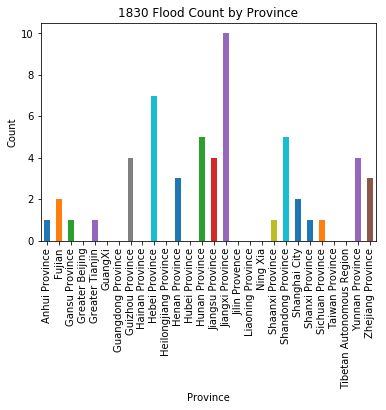

In [9]:
fig,ax33 = plt.subplots()
df.groupby('Province').Flood.count().plot(kind='bar',ax=ax33)
ax33.set_title('1830 Flood Count by Province')
ax33.set_ylabel('Count')

Text(0,0.5,'Count')

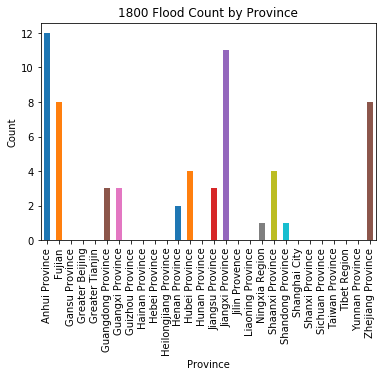

In [12]:
fig,ax333 = plt.subplots()
df_1800.groupby('Province').Flood.count().plot(kind='bar',ax=ax333)
ax333.set_title('1800 Flood Count by Province')
ax333.set_ylabel('Count')

Text(0.5,1,'1830 Drought Site in China')

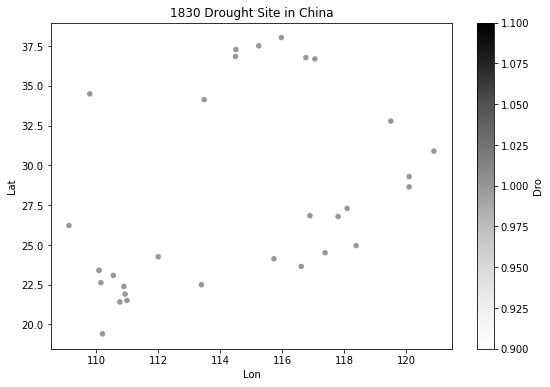

In [14]:
fig, ax = plt.subplots()
df.plot.scatter(x='Lon',y='Lat',c='Dro',figsize = (9,6),ax=ax)
ax.set_title('1830 Drought Site in China')

Text(0.5,1,'1800 Drought Site in China')

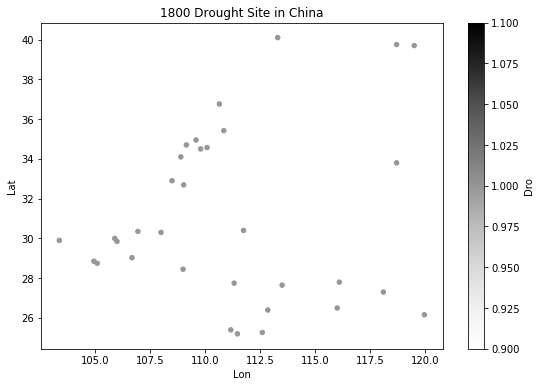

In [13]:
fig, ax = plt.subplots()
df_1800.plot.scatter(x='Lon',y='Lat',c='Dro',figsize = (9,6),ax=ax)
ax.set_title('1800 Drought Site in China')

Text(0.5,1,'1830 Precipitation Anomalies Site in China')

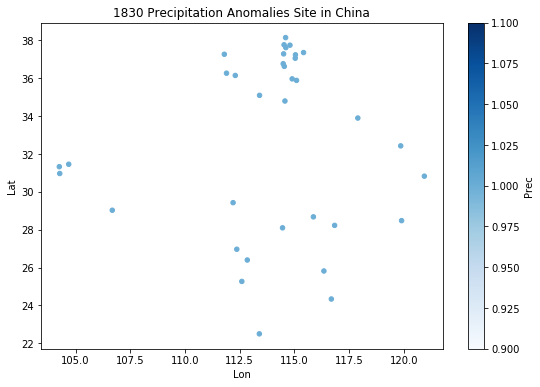

In [16]:
fig, ax1 = plt.subplots()
df.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Blues',figsize = (9,6),ax=ax1)
ax1.set_title('1830 Precipitation Anomalies Site in China')

Text(0.5,1,'1800 Precipitation Anomalies Site in China')

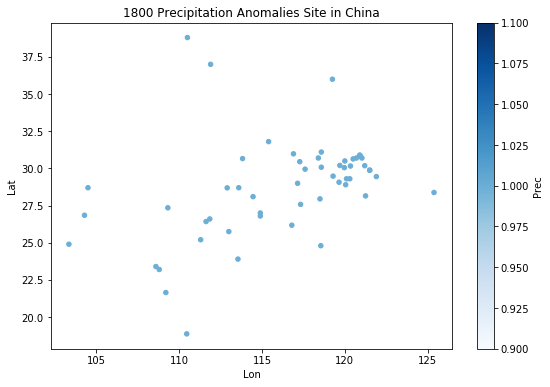

In [15]:
fig, ax1 = plt.subplots()
df_1800.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Blues',figsize = (9,6),ax=ax1)
ax1.set_title('1800 Precipitation Anomalies Site in China')

Text(0.5,1,'1830 Flood Site in China')

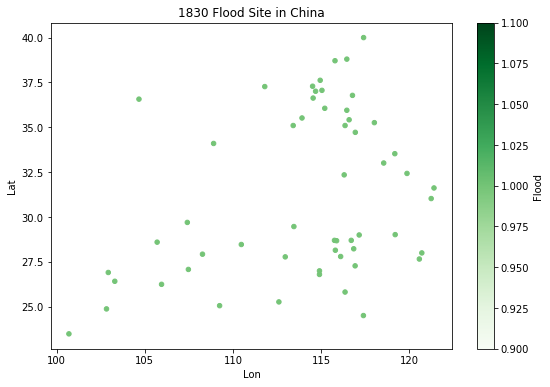

In [17]:
fig, ax2 = plt.subplots()
df.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax2)
ax2.set_title('1830 Flood Site in China')

Text(0.5,1,'1800 Flood Site in China')

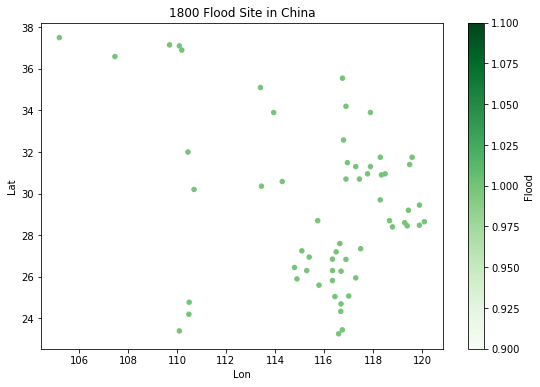

In [18]:
fig, ax2 = plt.subplots()
df_1800.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax2)
ax2.set_title('1800 Flood Site in China')

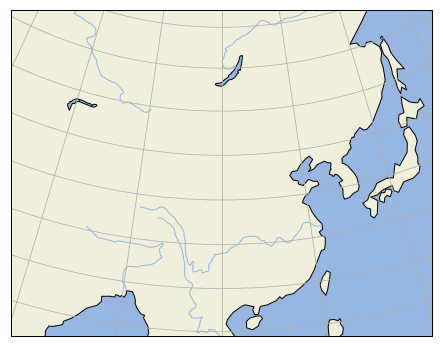

In [20]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [75, 135, 15, 60]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

Text(0.5,1,'1830 Drought Site in China')

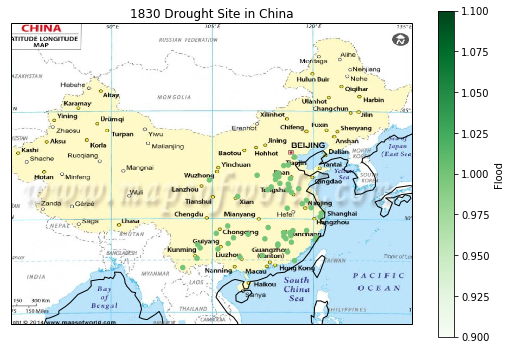

In [21]:
fig = plt.figure(figsize=(12,6))

fname = 'IMG_7584.JPG'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
df.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax)
#df.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Purples',figsize = (9,6),ax=ax)
#df.plot.scatter(x='Lon',y='Lat',c='Dro',cmap='Reds',figsize = (9,6),ax=ax)
ax.coastlines()
ax.set_title('1830 Drought Site in China')

Text(0.5,1,'1800 Drought Site in China')

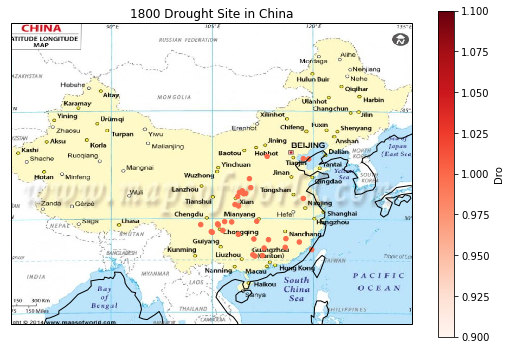

In [27]:
fig = plt.figure(figsize=(12,6))

fname = 'IMG_7584.JPG'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]

ax = plt.axes(projection = ccrs.PlateCarree())
ax.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
#df_1800.plot.scatter(x='Lon',y='Lat',c='Flood',cmap='Greens',figsize = (9,6),ax=ax)
#df_1800.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Purples',figsize = (9,6),ax=ax)
df_1800.plot.scatter(x='Lon',y='Lat',c='Dro',cmap='Reds',figsize = (9,6),ax=ax)
ax.coastlines()
ax.set_title('1800 Drought Site in China')

In [112]:
fig = plt.figure(figsize=(12,6))

fname = 'IMG_7584.JPG'
img = plt.imread(fname)

img_extent = [75, 135, 15, 60]
ax0,ax1,ax2=axes
axes = plt.axes(projection = ccrs.PlateCarree())
axes.imshow(img,origin='upper',extent = img_extent,transform = ccrs.PlateCarree())
#fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
#axes[0].plot.scatter(x='Lon',y='Lat',c='Flood',ax=ax)
#axes[0].plot.scatter(x='Lon',y='Lat',c='Dro',ax=ax)

import itertools

colors = itertools.cycle(["Blues", "Purples", "Reds"])
#category = ['Flood','Prec','Dro']
#for cate in category:
df.plot.scatter(x='Lon',y='Lat',c='Flood',cmap=next(colors),figsize = (9,6),ax=ax0)
df.plot.scatter(x='Lon',y='Lat',c='Prec',cmap='Purples',figsize = (9,6),ax=ax1)
df.plot.scatter(x='Lon',y='Lat',c='Dro',cmap='Reds',figsize = (9,6),ax=ax2)
ax.coastlines()
ax.set_title('1830 Drought Site in China')


TypeError: 'GeoAxesSubplot' object is not iterable

<Figure size 864x432 with 0 Axes>